In [50]:
import os
#import umap
import math
import h5py
import scipy
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helper import *


np.set_printoptions(precision=2)

plt.rcParams['axes.labelsize'] = 25
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.style.use('seaborn-whitegrid')
#plt.style.use('science')
%matplotlib inline

In [34]:
def get_distributions(arr):

    if len(arr)!=2:
        raise ValueError('Please enter only two arrays')

    temp_arr = np.hstack((arr[0],arr[1]))
    l_bound,u_bound = np.min(temp_arr),np.max(temp_arr)
    bins = np.arange(math.floor(l_bound),math.ceil(u_bound));

    p,_ = np.histogram(arr[0], bins = bins, density = True)
    q,_ = np.histogram(arr[1], bins = bins, density = True)

    return p,q

### Load training, test and control data

In [44]:
met_model = 'varma_ecoli_small'
exp_id = 'fdp1'


# Create control dataset
'''
all_data_km = np.load(f'gan_input/{met_model}/{exp_id}/all_km_fdp1.npy')
control_samples = 5000
range_km = [np.min(all_data_km), np.max(all_data_km)]
control_data = np.random.uniform(range_km[0],range_km[1],(control_samples,all_data_km.shape[1]))
np.save('control_data_{self.exp_id}.npy',control_data)
'''


X_train = np.load(f'gan_input/{met_model}/{exp_id}/X_train_fdp1.npy')
X_test = np.load(f'gan_input/{met_model}/{exp_id}/X_val_fdp1.npy')
X_control = np.log(np.load(f'gan_input/{met_model}/{exp_id}/control_data_fdp1.npy'))

### Calculate KL divergences

In [45]:
def calculate_distance(ref_data, path_to_folder, epochs, repeats):

    X_mean = ref_data.mean(axis=0)
    KL = []
    for rep in range(repeats):
        this_KL = []
        for j in range(0,epochs,10):
            this_set = np.load(f'{path_to_gan_data}repeat_{rep}/{j}_-1.npy')
            gan_mean = this_set.mean(axis=0)
            p,q = get_distributions([X_mean,gan_mean])
            this_KL.append(KL_div(q,p))
        KL.append(this_KL)
        
    return KL

In [46]:
epochs = 1000
repeats = 5
path_to_gan_data = 'gan_output_data/N-72000/'

KL_train = calculate_distance(X_train, path_to_gan_data, epochs, repeats)
KL_test = calculate_distance(X_test, path_to_gan_data, epochs, repeats)
KL_control = calculate_distance(X_control, path_to_gan_data, epochs, repeats)

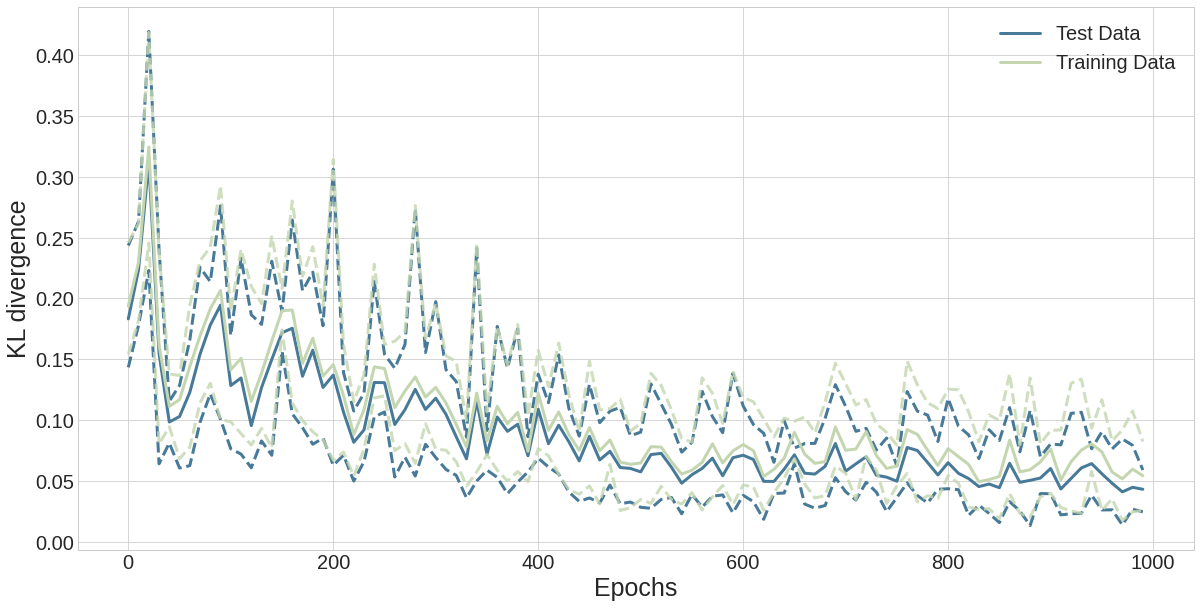

In [77]:
x_plot = np.arange(0,1000,10)
plt.figure(figsize=(20,10))


plt.plot(x_plot, np.array(KL_test).mean(axis = 0), color = '#477998', linewidth = 3, label = 'Test Data')
plt.plot(x_plot, np.array(KL_test).max(axis = 0), '--',color = '#477998', linewidth = 3, alpha = 1)
plt.plot(x_plot, np.array(KL_test).min(axis = 0), '--',color = '#477998' , linewidth = 3, alpha = 1)

plt.plot(x_plot, np.array(KL_train).mean(axis = 0), color = '#C4D6B0', linewidth = 3, label = 'Training Data')
plt.plot(x_plot, np.array(KL_train).max(axis = 0), '--',color = '#C4D6B0', linewidth = 3, alpha = 0.8)
plt.plot(x_plot, np.array(KL_train).min(axis = 0), '--',color = '#C4D6B0' , linewidth = 3, alpha = 0.8)


plt.legend(fontsize = 20)
plt.xlabel('Epochs')
plt.ylabel('KL divergence')

plt.savefig(f'figure_output/test_training.svg', dpi=300, 
                 transparent=False, bbox_inches='tight')

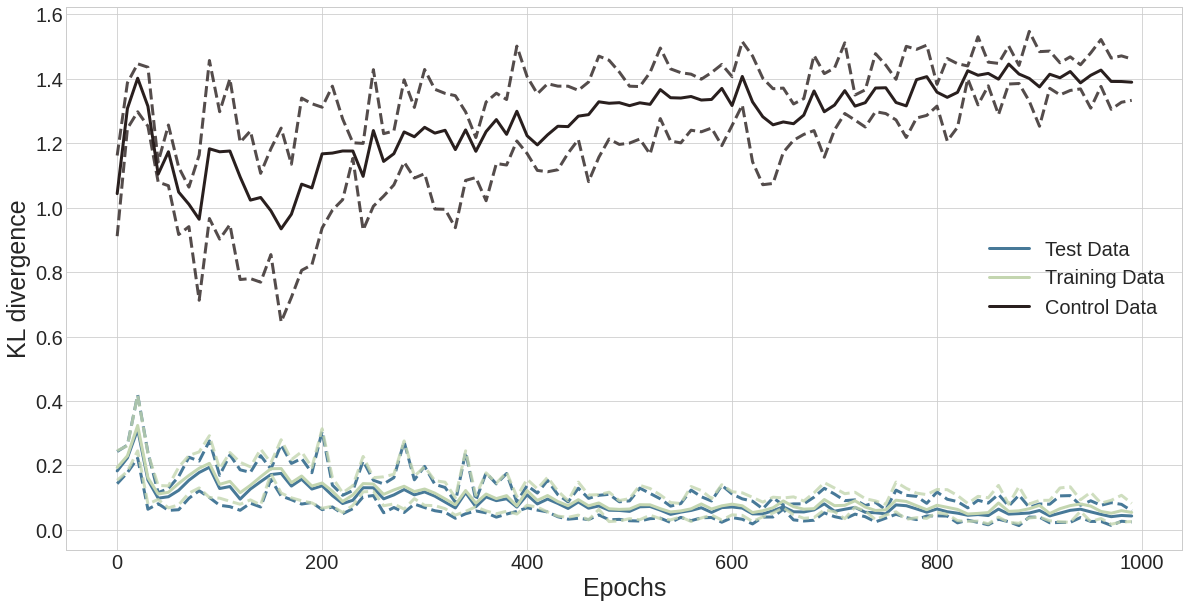

In [76]:
x_plot = np.arange(0,1000,10)
plt.figure(figsize=(20,10))


plt.plot(x_plot, np.array(KL_test).mean(axis = 0), color = '#477998', linewidth = 3, label = 'Test Data')
plt.plot(x_plot, np.array(KL_test).max(axis = 0), '--',color = '#477998', linewidth = 3, alpha = 1)
plt.plot(x_plot, np.array(KL_test).min(axis = 0), '--',color = '#477998' , linewidth = 3, alpha = 1)

plt.plot(x_plot, np.array(KL_train).mean(axis = 0), color = '#C4D6B0', linewidth = 3, label = 'Training Data')
plt.plot(x_plot, np.array(KL_train).max(axis = 0), '--',color = '#C4D6B0', linewidth = 3, alpha = 0.8)
plt.plot(x_plot, np.array(KL_train).min(axis = 0), '--',color = '#C4D6B0' , linewidth = 3, alpha = 0.8)

plt.plot(x_plot, np.array(KL_control).mean(axis = 0), color = '#291F1E', linewidth = 3, label = 'Control Data')
plt.plot(x_plot, np.array(KL_control).max(axis = 0), '--',color = '#291F1E', linewidth = 3, alpha = 0.8)
plt.plot(x_plot, np.array(KL_control).min(axis = 0), '--',color = '#291F1E' , linewidth = 3, alpha = 0.8)

plt.legend(fontsize = 20)
plt.xlabel('Epochs')
plt.ylabel('KL divergence')

plt.savefig(f'figure_output/test_training_control.svg', dpi=300, 
                 transparent=False, bbox_inches='tight')